# Module 3- Regression & Beta Calculation



   ### Welcome to the Answer notebook for Module 3 ! 



#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [27]:
gold = pd.read_csv('CSV/GOLD.csv')

In [28]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [29]:
gold.shape

(512, 9)

In [30]:
gold.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [31]:
Gold= gold.dropna()

In [32]:
x = Gold[['Price','Open','High','Low']]
y = Gold['Pred']

In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33 , random_state=42)

In [34]:
x_train.head()

,Price,Open,High,Low
382,31631,31650,31780,31590
181,29761,29876,29884,29705
119,29541,29600,29622,29524
361,30614,30399,30660,30376
209,30306,30518,30597,30270


In [35]:
from sklearn import linear_model

In [36]:
lm = linear_model.LinearRegression()

In [37]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
lm.coef_

array([ 2.,  3., -1., -4.])

In [39]:
coeff=pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])
coeff

,Coeff
Price,2.0
Open,3.0
High,-1.0
Low,-4.0


In [40]:
predict = lm.predict(x_test)

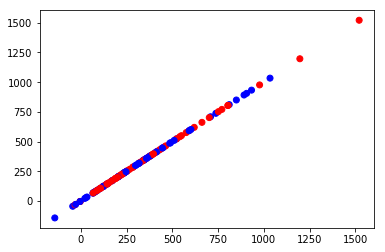

In [41]:
plt.scatter(y_test,predict,c=['b','r'])

In [45]:
gold['Pred']=lm.predict(gold[['Price','Open','High','Low']])

In [46]:
gold.shape

(512, 10)

In [47]:
gold.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
pred        0
dtype: int64

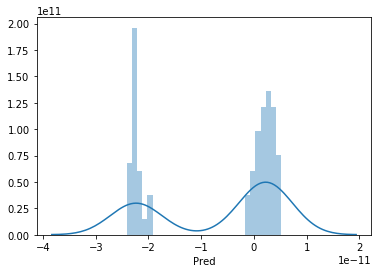

In [49]:
sns.distplot(y_test-predict,bins=30)


CAPM CAPM Analysis and Beta Calculation using regression - 
CAPM(Capital Asset Pricing Model) attempts to price securities by examining the relationship that exists between expected returns and risk. 
Read more about CAPM. (Investopedia CAPM reference) 
The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index). What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow? 
Read more about Beta (Investopedia Beta reference)

### Query 3.2
3.2 Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -
The daily Beta value for the past 3 months. (Daily= Daily returns)
The monthly Beta value. (Monthly= Monthly returns)
Refrain from using the (covariance(x,y)/variance(x)) formula. 
Attempt the question using regression.(Regression Reference) 
Were the Beta values more or less than 1 ? What if it was negative ? 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [50]:
import statsmodels.api as sm

In [53]:
maruti = pd.read_csv('CSV/MARUTI.csv')
maruti = maruti[maruti.Series == 'EQ']
maruti.index = maruti.Date
nifty = pd.read_csv('CSV/Nifty50.csv')
nifty.index = nifty.Date

prices = pd.concat([maruti['Close Price'],nifty['Close']],axis = 1)
prices.columns = ['maruti', 'nifty']

print(prices.head())

returns = prices.pct_change()
returns = returns.dropna(axis=0)
returns.head()

              maruti    nifty
Date                         
15-May-2017  6823.90  9445.40
16-May-2017  6953.95  9512.25
17-May-2017  6958.20  9525.75
18-May-2017  6831.05  9429.45
19-May-2017  6790.55  9427.90


,maruti,nifty
Date,,
16-May-2017,0.019058,0.007078
17-May-2017,0.000611,0.001419
18-May-2017,-0.018273,-0.010109
19-May-2017,-0.005929,-0.000164
22-May-2017,-0.013084,0.001098


In [56]:
returns = returns.iloc[-60:,:]

In [57]:
returns

,maruti,nifty
Date,,
11-Feb-2019,0.006118,-0.005007
12-Feb-2019,-0.002145,-0.005271
13-Feb-2019,-0.018743,-0.003485
14-Feb-2019,-0.001530,-0.004410
15-Feb-2019,-0.012462,-0.002015
18-Feb-2019,-0.012605,-0.007781
19-Feb-2019,-0.005575,-0.003440
20-Feb-2019,0.006665,0.012363
21-Feb-2019,-0.007058,0.005067


In [59]:
x = returns['nifty']
y = returns['maruti']

x1=sm.add_constant(x)

model=sm.OLS(y,x1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 maruti   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     10.28
Date:                Tue, 06 Aug 2019   Prob (F-statistic):            0.00219
Time:                        01:42:48   Log-Likelihood:                 179.65
No. Observations:                  60   AIC:                            -355.3
Df Residuals:                      58   BIC:                            -351.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.002     -1.006      0.3

### Monthly Beta

In [60]:
prices['month']=prices.index.str.slice(3)

In [61]:
month=np.zeros((25,2),dtype=float)
for i , j in enumerate (prices.month.unique()):
    temp = prices[prices.month==j]
    month[i]=temp.iloc[-1,0:2]
    
    
month

array([[ 7211.  ,  9621.25],
       [ 7217.6 ,  9520.9 ],
       [ 7750.05, 10077.1 ],
       [ 7700.3 ,  9917.9 ],
       [ 7978.2 ,  9788.6 ],
       [ 8211.25, 10335.3 ],
       [ 8599.1 , 10226.55],
       [ 9729.55, 10530.7 ],
       [ 9509.7 , 11027.7 ],
       [ 8850.95, 10492.85],
       [ 8861.1 , 10113.7 ],
       [ 8814.95, 10739.35],
       [ 8537.2 , 10736.15],
       [ 8825.6 , 10714.3 ],
       [ 9520.55, 11356.5 ],
       [ 9096.4 , 11680.5 ],
       [ 7347.95, 10930.45],
       [ 6616.4 , 10386.6 ],
       [ 7661.6 , 10876.75],
       [ 7465.5 , 10862.55],
       [ 6641.15, 10830.95],
       [ 6829.7 , 10792.5 ],
       [ 6672.55, 11623.9 ],
       [ 6666.4 , 11748.15],
       [ 6543.75, 11148.2 ]])

In [62]:
month=pd.DataFrame(month)

In [63]:
month.columns=['maruti','nifty']
month.index=prices['month'].unique()
month

,maruti,nifty
May-2017,7211.00,9621.25
Jun-2017,7217.60,9520.90
Jul-2017,7750.05,10077.10
Aug-2017,7700.30,9917.90
Sep-2017,7978.20,9788.60
Oct-2017,8211.25,10335.30
Nov-2017,8599.10,10226.55
Dec-2017,9729.55,10530.70
Jan-2018,9509.70,11027.70
Feb-2018,8850.95,10492.85


In [66]:
returnsm = month.pct_change()
returnsm = returnsm.dropna(axis=0)

xm = returnsm['nifty']
ym = returnsm['maruti']

x1m = sm.add_constant(xm)

model = sm.OLS(ym,x1m)

resutls = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 maruti   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     10.28
Date:                Tue, 06 Aug 2019   Prob (F-statistic):            0.00219
Time:                        02:10:33   Log-Likelihood:                 179.65
No. Observations:                  60   AIC:                            -355.3
Df Residuals:                      58   BIC:                            -351.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.002     -1.006      0.3

### A negative beta correlation means an investment moves in the opposite direction from the stock market. When the market rises, a negative-beta investment generally falls. When the market falls, the negative-beta investment will tend to rise.